The deadline for this homework is on **20.05.2022 15:59** (right before the practice session). After completing the exercises, you should

1. Download this file into your computer (`File` $\to$ `Download .ipynb`)

2. Download the python files (`.py`) (*if there are any attached to the homework that you need to complete*). 

3. Compress the above files (`.zip` `.rar`) and name the compressed file in the following way *HWx_NameSurname* (for example `HW2_NorayrGalikyan.zip`)

4. Send the compressed file to this email address `fast.1991.ml@gmail.com` with subject **ML2**

**Note**

* if you do not follow any of the above conditions, your homework will not be graded.

* you do not need to send any dataset files or helper scripts that I provide with your homework (since I already have them).

* you need to write the code for the exercises yourself; you can use ``built-in functions``, ``numpy``, ``pandas``
and ``matplotlib``. Use of other libraries or packages (e.g., scikit-learn) will result in points deducted.

# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw2.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [10]:
cd /content/drive/MyDrive/ML/Homework2

/content/drive/MyDrive/ML/Homework2


5. Now that we are in the desired location, we can unzip the compressed file. 

  **Note that this step needs to be done only once**

In [ ]:
# !unzip hw2.zip

6. Run the below code snippet to import all the necessary libraries, as well as the modules (``knn.py`` and ``naive_bayes.py``), which you will fill in soon.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style

from knng import KNearestNeighbor
from naive_bayes import NaiveBayes

%load_ext autoreload
%autoreload 2

# K-nearest neighbours

In this exercise you will program your own KNN algorithm and compare it to sklearn's implementation. We will use `car.csv` dataset for this. The dataset is from [kaggle](https://www.kaggle.com/elikplim/car-evaluation-data-set) and I suggest that you read the details before starting coding. Run the below code to load the dataset.

In [12]:
data = pd.read_csv("car.csv", dtype="category", header = None)
data.columns = ["buying", "maint", "doors", "persons", 
                "lug-boot", "safety", "accept"]

**Problem1.** First let's divide our data into train and test sets, so that we are able to evaluate the performance of our classifiers. Complete the below function ``train_test_split`` for that purpose.

In [3]:
def train_test_split(data, test_size, random_state):
  """
  Splits the given dataset into 4 chunks (X_train, y_train, X_test, y_test)
  :param data: nd array of size (nr_data_points, nr_features+1)
               which includes the label as the last column
  :param test_size: float from (0, 1) interval that defines the proportion
                    of data points that should be in the test data
  :param random_state: int for fixing the randomness in order to reproduce
                       the same results
  :returns: tuple of nd arrays (X_train, y_train, X_test, y_test)
  """

  nr_data_points = data.shape[0]
  np.random.seed(random_state)
  indices = np.arange(nr_data_points)
  np.random.shuffle(indices)

  nr_train_data = int(nr_data_points*(1-test_size))
  train_indices = indices[:nr_train_data]
  test_indices = indices[nr_train_data:]

  # apply the indices to get the 4 sets

  X_train = data[train_indices].T[:-1].T
  y_train = data[train_indices].T[-1:].T.flatten()
  X_test = data[test_indices].T[:-1].T
  y_test = data[test_indices].T[-1:].T.flatten()

  return X_train, y_train, X_test, y_test


When you are done filling the code, run the below code cell in order to check your implementation. If everything is correct, then you want see any errors, otherwise you should resolve the errors before going ahead.

In [4]:
# DO NOT CHANGE ANYTHING IN THIS CELL

some_data = np.array([[0, 1, 0],
                      [2, 1, 1],
                      [1, 2, 0],
                      [3, 1, 0],
                      [1, 3, 0]])

x_set1, y_set1, x_set2, y_set2 = train_test_split(some_data,
                                                  test_size=0.2,
                                                  random_state=10)
assert x_set1.shape == (4, 2)
assert y_set1.shape == (4,)
assert x_set2.shape == (1, 2)
assert y_set2.shape == (1, )
assert y_set2 == 1
assert np.all(x_set2 == np.array([2, 1]))
# DO NOT CHANGE ANYTHING IN THIS CELL

Now that you have checked your ``train_test_split`` function, run the below code cell to create the 4 data sets.

In [13]:
X_train, y_train, X_test, y_test = train_test_split(data.values,
                                                    test_size=0.25,
                                                    random_state=0)


In the last homework you have created a function to calculate the error rate, in this homework you will implement the function to calculate the accuracy of the classifiers, which is the number of correctly classified instances over all instances.

In [6]:
def accuracy(actual, predicted):
  """
  Calculates the accuracy of the predictions.
  :param y_true: nd array of size (nr_data_points,)
  :param y_pred: nd array of size (nr_data_points,)
  """
  # YOUR CODE STARTS HERE
  # Hints: y_true is the vector of actual labels
  # and y_pred is the output of the model's predict method
  # YOUR CODE ENDS HERE  
  return len(actual[predicted==actual])/len(actual)

**Problem2.** Now complete the code inside ``knn.py`` script in order to train a KNN model on the training data and test its performance on the testing data defined above. If you do everything correctly you will get around $76 \%$ accuracy on the test set by running the code below.

In [26]:
# Convert categorical to numerical
for i in data.columns:
  data[i].replace(tuple(np.unique(data[i])),(np.arange(len(np.unique(data[i])))), inplace = True)

# Թվերի հետ ավելի հեշտ է աշխատել, քան string-երի... իմ կարծիքով... ։  

X_train, y_train, X_test, y_test = train_test_split(data.values,
                                                    test_size=0.25,
                                                    random_state=0)
                                                    

In [7]:
a = np.array([1,2,3,3,2,1,5])
l = list(set(a))
l

[1, 2, 3, 5]

In [27]:
from knn import KNearestNeighbor

model = KNearestNeighbor(k=1)
model.fit(X_train, y_train)
dist_im=model.compute_distances(X_test)
pred_im = model.predict(X_test)
# accuracy(y_test, pred_im)*100
print(f'{accuracy(y_test, pred_im)*100:.{2}f}','%')

78.01 %


Now try different values for k, for example $(1,3,...,15)$ and plot the resulting accuracies (on y-axis) with respect to the values of $k$ (on x-axis).

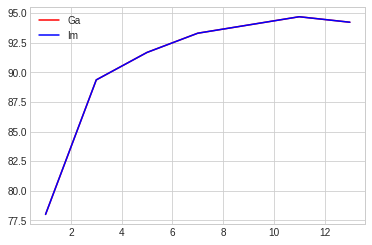

In [29]:

my = []
for i in range(1,15,2):
  model = KNearestNeighbor(k=i)
  model.fit(X_train, y_train)
  dist_im=model.compute_distances(X_test)
  pred_im = model.predict(X_test)
  my.append(accuracy(y_test, pred_im)*100)

x=[i for i in range(1,15,2)]
plt.plot(x,my2,color='red',label='Ga')
plt.plot(x,my,color='b',label='Im')
plt.legend();

**Question** What do you notice in the resulting plot? What happens when we increase the number of nearest neighbors? 

**Answer** 

Հարևանների քանակը ավելացնելիս սխալը պակասում է։ Այսինքն ավելի մեծ K - երի դեմպքում ունենք տարրին մի քանի ամենամոտիկ X_train - երը, որոնց միջոցով էլ ավելի ճիշտ ենք պիտակավորում։

## Comparing with `sklearn`'s implementation

For `sklearn`'s implementation the data should be converted to numeric. Run the below code to do so.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data1 = enc.fit_transform(data)

We should apply the same split, in order to do a fair comparison.

In [ ]:
X_train1, y_train1, X_test1, y_test1 = train_test_split(data1,
                                                        test_size=0.25,
                                                        random_state=0)

Now that we have prepared the data, let's apply the classifier from sklearn on it by running the below code.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=1, metric='hamming')
model2.fit(X_train1, y_train1)
pred = model2.predict(X_test1)
print(f'{accuracy(y_test, pred_im)*100:.{2}f}','%')

94.21 %


**Question** Do you get the same result with your implementation? Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) and state below the main difference.

**Answer**

k = 1 դեպքում նույնն է ստացվել, բայց մի փոքր տարբեր արդյունք է ստացվում շատ հարևաններով։ 

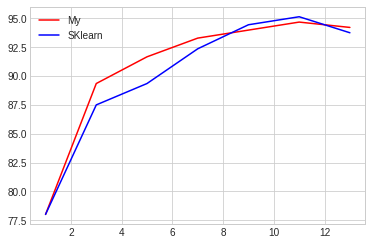

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
SK = []
for i in range(1,15,2):
  model2 = KNeighborsClassifier(n_neighbors=i, metric='hamming')
  model2.fit(X_train1, y_train1)
  pred = model2.predict(X_test1)
  SK.append(accuracy(y_test1, pred)*100)

x=[i for i in range(1,15,2)]
plt.plot(x,my,color='red',label='My')
plt.plot(x,SK,color='blue',label='SKlearn')
plt.legend();

If you have figured out what the difference is, use sklearn's implementation and reproduce your result on the same data set below.

# Naive-Bayes 

Now implement your own Naive Bayes method by fill in the methods in the prepared class `NaiveBayes` in `naive_bayes.py` script. Don't worry about the implementation speed at the moment, although, it would be good if you use your experience with Python to come up with an implementation that would also be efficient. Feel free to add methods or change the existing ones, but make sure that the functions `fit` and `predict` will still be in the class. 

If you implement everything correctly, you will get about $88.19\%$ accuracy on the test set with and without Laplace smoothing ($\epsilon=1$).

In [ ]:
model = NaiveBayes(smoothing=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'{accuracy(predictions, y_test)*100:.{2}f}','%')

88.19 %


In [ ]:
# without smoothing
model = NaiveBayes(smoothing=False)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'{accuracy(predictions, y_test)*100:.{2}f}','%')

88.19 %


## Comparing with `sklearn` implementation

For `sklearn`'s Naive Bayes implementation the data should be converted to numeric as in the case of KNN.

Sklearn has different types of Naive Bayes classifiers such as `GaussianNB`, `MultinomialNB`, `BernouliNB` etc., for different types of data. To learn more about these different types visit [here](https://scikit-learn.org/stable/modules/naive_bayes.html). 

In our case we have categorical data and our assumption was that each feature has `categorical distribution` (generalization of bernouli distribution for more than 2 possible outcomes).

In [ ]:
from sklearn.naive_bayes import CategoricalNB

# with smoothing (alpha is the same as epsilon)
model = CategoricalNB(alpha=1)
model.fit(X_train1, y_train1)
predictions = model.predict(X_test1)
print(f'{accuracy(predictions, y_test1)*100:.{2}f}','%')

88.19 %


In [ ]:
# without smoothing (we set a very small alpha in order to avoid warnings)
model = CategoricalNB(alpha=1e-10)
model.fit(X_train1, y_train1)
predictions = model.predict(X_test1)
print(f'{accuracy(predictions, y_test1)*100:.{2}f}','%')

88.19 %


**Question** Do you get the same result with your implementation?

**Answer**

Naive-Bayes - ի համար ստացա նույն արդյունքը։